# VADER (Valence Aware Dictionary and sEntiment Reasoner) is a popular sentiment analysis model specifically designed for analyzing sentiment in social media texts. It is available in the NLTK (Natural Language Toolkit) library, which is commonly used for natural language processing tasks in Python.

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('ggplot')

import nltk


# Read in data 
df =  pd.read_csv('./input/Reviews.csv')

df = df.head(500)

df['Score'].value_counts().sort_index()


1     36
2     18
3     37
4     70
5    339
Name: Score, dtype: int64

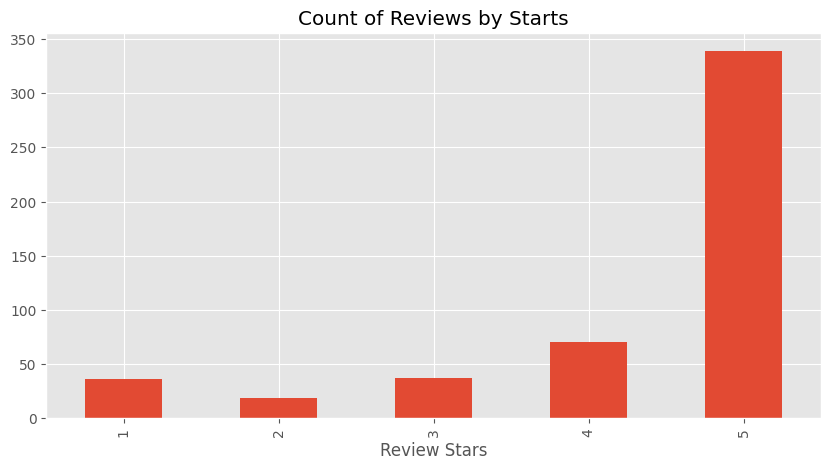

In [13]:
ax = df['Score'].value_counts().sort_index() \
     .plot(kind = 'bar', 
          title = 'Count of Reviews by Starts', 
          figsize=(10, 5))
    
ax.set_xlabel('Review Stars')
plt.show()

In [16]:
# Basic NLTK 

In [18]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [23]:
word_tokens = nltk.word_tokenize(example)
word_tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [26]:
tagged = nltk.pos_tag(word_tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [35]:
# convert chunks of data
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


<bound method Tree.pprint of Tree('S', [('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ'), (',', ','), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('like', 'VB'), ('it', 'PRP'), ('.', '.'), Tree('ORGANIZATION', [('Quaker', 'NNP'), ('Oats', 'NNPS')]), ('is', 'VBZ'), ('the', 'DT'), ('way', 'NN'), ('to', 'TO'), ('go', 'VB'), ('.', '.')])>

In [38]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
sia.polarity_scores('I am so !')

{'neg': 0.0, 'neu': 0.401, 'pos': 0.599, 'compound': 0.4561}

In [6]:
sia.polarity_scores("This is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [39]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# Run the polarity score on entire data set

In [42]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)







  0%|                                                                                          | 0/500 [00:00<?, ?it/s]





 16%|█████████████                                                                   | 82/500 [00:00<00:00, 818.47it/s]





 33%|█████████████████████████▉                                                     | 164/500 [00:00<00:00, 645.66it/s]





 46%|████████████████████████████████████▍                                          | 231/500 [00:00<00:00, 620.44it/s]





100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 894.76it/s]


In [57]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders = vaders.merge(df, how = 'left', on = 'Id')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


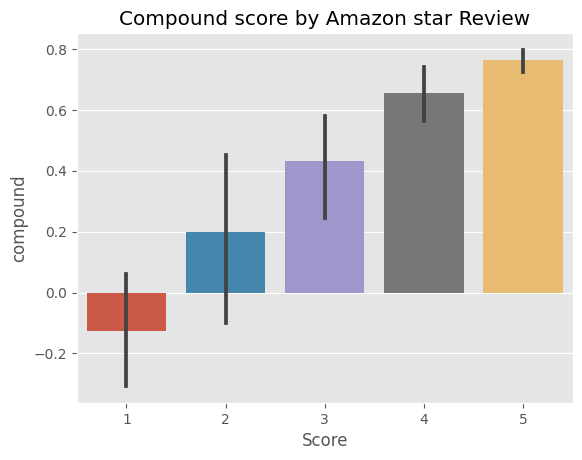

In [59]:
# let's plot the review with sentiment scores 
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound')
ax.set_title('Compound score by Amazon star Review')
plt.show()

Text(0.5, 1.0, 'Negative')

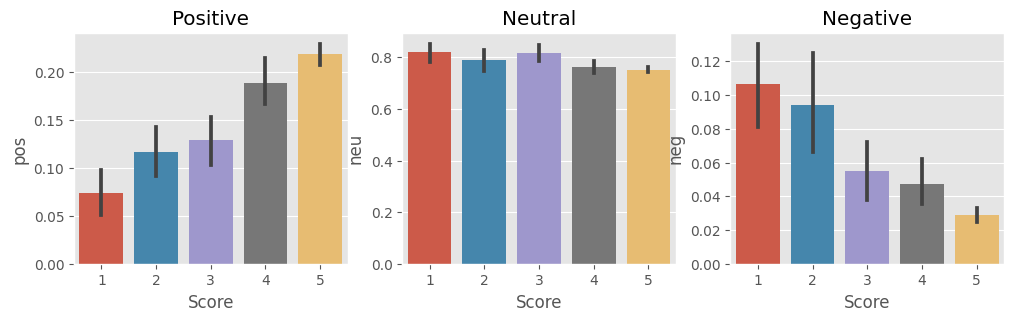

In [62]:
# pos, neg, neu individual ploting using matplotlib
fig, axs = plt.subplots(1, 3, figsize = (12, 3))
sns.barplot(data = vaders, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'Score', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
